In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_48405/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((1605, 60, 1), (1605, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(1605, 60, 1)

In [12]:
X[0], y[0]

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.22608115]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 145ms/step


(array([[0.22638999]], dtype=float32), array([0.22509972]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[1154.6301]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[1148.5300293]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

51/51 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [22]:
y.shape

(1605, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,1148.530029,1154.630127,1056.630737,982.806946,1110.594482,1120.288330,1032.886353,1158.527832,1116.076904,1123.469971,1120.860596,1151.738159,1117.246216
2018-01-09,1299.739990,1149.887085,1113.367554,1044.376709,1152.024048,1165.970215,1081.551025,1153.825439,1158.623169,1164.269287,1157.180420,1185.074951,1158.784790
2018-01-10,1255.819946,1304.994629,1197.697632,1102.710693,1239.109863,1252.916626,1153.575684,1307.270264,1253.817627,1259.545166,1260.577026,1293.350586,1253.701294
2018-01-11,1154.930054,1259.831055,1238.503662,1152.040405,1272.625854,1293.363281,1204.433105,1262.659668,1281.089600,1293.133789,1283.468994,1310.049438,1286.697266
2018-01-12,1273.199951,1156.429810,1258.810791,1192.832642,1240.445801,1275.146362,1222.353760,1160.311768,1240.408203,1249.631958,1227.625732,1244.943481,1247.839600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,1724.922852,1829.809692,1970.596680,2084.075684,1918.233154,1984.330200,1991.501099,1821.674316,1922.127075,1921.740967,1886.507324,1888.506592,1917.571777
2022-05-28,1757.941772,1746.827271,1882.690674,2054.317627,1829.961914,1893.256104,1940.486938,1740.810669,1828.014893,1824.762329,1789.336426,1791.711426,1816.755249
2022-05-29,1812.031006,1781.480957,1802.532593,2022.240356,1786.849365,1846.012451,1903.810913,1774.600952,1795.264038,1794.254761,1769.703125,1781.092407,1794.824219


# LSTM Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
#predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
#predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
#predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
#predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
#predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
#predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
#predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
#predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
#predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
#predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

predictions_df = predictions_df[['Actual', 'LSTM_1', 'GRU_60']]

In [26]:
predictions_df

,Actual,LSTM_1,GRU_60
Date,,,
2018-01-08,0.225100,0.239155,0.225226
2018-01-09,0.257083,0.238089,0.234325
2018-01-10,0.247793,0.272938,0.255117
2018-01-11,0.226453,0.262791,0.262344
2018-01-12,0.251469,0.239559,0.253833
...,...,...,...
2022-05-27,0.347016,0.390850,0.400538
2022-05-28,0.354000,0.372206,0.378454
2022-05-29,0.365441,0.379992,0.373650


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((1284, 2), (1284,), (160, 2), (160,), (161, 2), (161,))

In [29]:
meta_training_X

,LSTM_1,GRU_60
Date,,
2018-01-08,0.239155,0.225226
2018-01-09,0.238089,0.234325
2018-01-10,0.272938,0.255117
2018-01-11,0.262791,0.262344
2018-01-12,0.239559,0.253833
...,...,...
2021-07-10,0.472463,0.464783
2021-07-11,0.464009,0.456099
2021-07-12,0.470778,0.457162


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 2, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 2, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 2, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((1284, 2, 1), (160, 2, 1), (161, 2, 1))

In [31]:
meta_training_X[0]

array([[0.23915479],
       [0.22522588]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((1284, 1), (160, 1), (161, 1))

In [33]:
meta_training_y[0]

array([0.22509972])

In [34]:
meta_model = Sequential()
meta_model.add(InputLayer(input_shape = (2, 1)))
meta_model.add(LSTM(64))
meta_model.add(Dense(1, activation = 'linear'))

meta_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
cp = ModelCheckpoint('models/meta_model.h5', save_best_only = True)
meta_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [36]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 200, validation_data = (meta_validation_X, meta_validation_y), callbacks = [cp], batch_size = 256)

Epoch 1/200
6/6 [==============================] - 1s 42ms/step - loss: 0.0303 - root_mean_squared_error: 0.1740 - mean_absolute_error: 0.0995 - val_loss: 0.4996 - val_root_mean_squared_error: 0.7068 - val_mean_absolute_error: 0.6911
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0293 - root_mean_squared_error: 0.1712 - mean_absolute_error: 0.0957 - val_loss: 0.4899 - val_root_mean_squared_error: 0.6999 - val_mean_absolute_error: 0.6842
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0284 - root_mean_squared_error: 0.1686 - mean_absolute_error: 0.0923 - val_loss: 0.4809 - val_root_mean_squared_error: 0.6934 - val_mean_absolute_error: 0.6777
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0276 - root_mean_squared_error: 0.1660 - mean_absolute_error: 0.0892 - val_loss: 0.4717 - val_root_mean_squared_error: 0.6868 - val_mean_absolute_error: 0.6710
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - lo

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 5ms/step - loss: 0.0245 - root_mean_squared_error: 0.1564 - mean_absolute_error: 0.0804 - val_loss: 0.4367 - val_root_mean_squared_error: 0.6609 - val_mean_absolute_error: 0.6451
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - mean_absolute_error: 0.0791 - val_loss: 0.4280 - val_root_mean_squared_error: 0.6542 - val_mean_absolute_error: 0.6385
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - mean_absolute_error: 0.0781 - val_loss: 0.4197 - val_root_mean_squared_error: 0.6479 - val_mean_absolute_error: 0.6321
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0225 - root_mean_squared_error: 0.1499 - mean_absolute_error: 0.0774 - val_loss: 0.4115 - val_root_mean_squared_error: 0.6415 - val_mean_absolute_error: 0.6258
Epoch 12/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0218

In [37]:
meta_model = load_model('models/meta_model.h5')

In [38]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

6/6 [==============================] - 0s 807us/step


,Actual,Predicted
0,0.824444,0.832139
1,0.851078,0.827272
2,0.838380,0.850042
3,0.847961,0.841903
4,0.842472,0.849316
...,...,...
156,0.347016,0.360787
157,0.354000,0.341844
158,0.365441,0.345258
159,0.404446,0.355827


In [39]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [40]:
test_results

,Actual,Predicted
0,3852.765098,3887.890625
1,3974.349606,3865.670898
2,3916.382015,3969.620850
3,3960.121857,3932.466064
4,3935.061755,3966.306885
...,...,...
156,1673.235164,1736.103271
157,1705.118235,1649.625977
158,1757.346800,1665.212036
159,1935.413369,1713.460693


In [41]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [42]:
test_results

,Actual,Predicted
2021-12-22,3852.765098,3887.890625
2021-12-23,3974.349606,3865.670898
2021-12-24,3916.382015,3969.620850
2021-12-25,3960.121857,3932.466064
2021-12-26,3935.061755,3966.306885
...,...,...
2022-05-27,1673.235164,1736.103271
2022-05-28,1705.118235,1649.625977
2022-05-29,1757.346800,1665.212036
2022-05-30,1935.413369,1713.460693


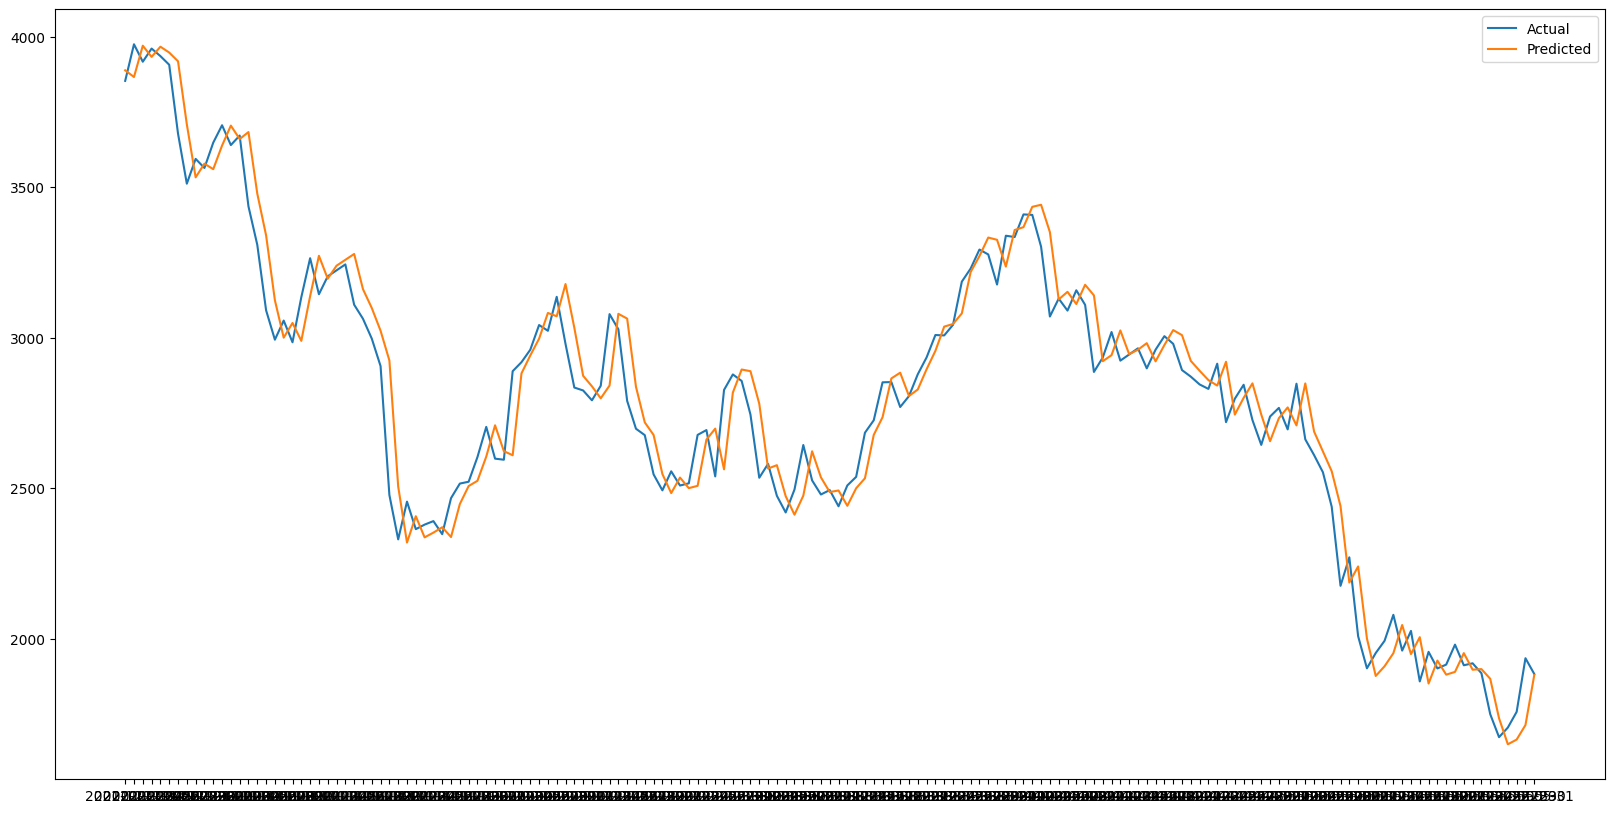

In [43]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()

In [44]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 116.18839982388474, MAE: 89.58922665657349
